In [135]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
from scipy.signal import medfilt
%load_ext tensorboard
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Load data

In [136]:
df = pd.read_csv('../input/foreign-exchange-rates-per-dollar-20002019/Foreign_Exchange_Rates.csv', index_col='Unnamed: 0')
df

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,71.28,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,71.3,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [137]:
df.isnull().sum()

Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND - FRANC/US$                      0
TAIWAN - NEW 

In [138]:
(df == 'ND').sum()

Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANKAN RUPEE/US$             198
SWITZERLAND - FRANC/

In [142]:
values = df['EURO AREA - EURO/US$'].values
time = df['Time Serie']
values[values == 'ND'] = 0
values = values.astype(np.float32)

In [143]:
for idx, val in enumerate(values):
    if val == 0:
        value[idx] = np.mean([value[idx-1], value[idx+1]])

In [144]:
values = medfilt(values, 5)

In [147]:
X_train, X_val = train_test_split(values, test_size=0.2, shuffle=False)
X_train.shape

(4173,)

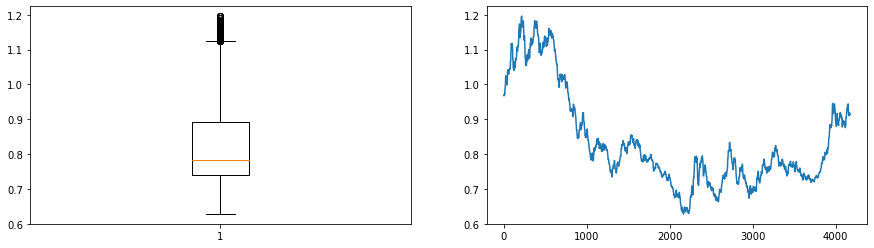

In [148]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.subplot(1, 2, 2)
plt.plot(X_train)

### Example

In [149]:
dataset = tf.data.Dataset.range(10)
print(dataset)
dataset = dataset.window(5, shift=1, drop_remainder=True)
print(dataset)
dataset = dataset.flat_map(lambda window: window.batch(5))
print(dataset)
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
print(dataset)
for x, y in dataset:
    print(x.numpy(), y.numpy())

<RangeDataset shapes: (), types: tf.int64>
<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>
<FlatMapDataset shapes: (None,), types: tf.int64>
<MapDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [150]:
dataset = tf.data.Dataset.from_tensor_slices(X_train)
print(dataset)
dataset = dataset.window(5, shift=1, drop_remainder=True)
print(dataset)
dataset = dataset.flat_map(lambda window: window.batch(5))
print(dataset)
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
print(dataset)
for ii, (x, y) in enumerate(dataset):
    print(x.numpy(), y.numpy())
    if ii > 10: break

<TensorSliceDataset shapes: (), types: tf.float64>
<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.float64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.float64, name=None), TensorShape([]))>
<FlatMapDataset shapes: (None,), types: tf.float64>
<MapDataset shapes: ((None,), (None,)), types: (tf.float64, tf.float64)>
[0.96759999 0.96859998 0.97000003 0.97000003] [0.96880001]
[0.96859998 0.97000003 0.97000003 0.96880001] [0.97140002]
[0.97000003 0.97000003 0.96880001 0.97140002] [0.9727]
[0.97000003 0.96880001 0.97140002 0.9727    ] [0.97369999]
[0.96880001 0.97140002 0.9727     0.97369999] [0.9727]
[0.97140002 0.9727     0.97369999 0.9727    ] [0.97369999]
[0.9727     0.97369999 0.9727     0.97369999] [0.9874]
[0.97369999 0.9727     0.97369999 0.9874    ] [0.9874]
[0.9727     0.97369999 0.9874     0.9874    ] [0.98799998]
[0.97369999 0.9874     0.9874     0.98799998] [0.98860002]
[0.9874     0.9874     0.98799998 0.98860002] [0.99010003]

## Create dataset

In [151]:
def create_dataset(series, window_size, batch_size, shuffle_buffer, step=1):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    print(dataset)
    dataset = dataset.window(window_size + 1, shift=step, drop_remainder=True)
    print(dataset)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    print(dataset)
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    print(dataset)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

def create_datasetV2(series, window_size, batch_size, shuffle_buffer, step=1):
    return tf.keras.preprocessing.sequence.TimeseriesGenerator(
    series, series, length=window_size, sampling_rate=step, stride=1, start_index=0, end_index=None,
    shuffle=True if shuffle_buffer > 0 else False, reverse=False, batch_size=batch_size)

In [152]:
X = create_datasetV2(X_train, 32, 64, 0)
X_test = create_datasetV2(X_val, 32, 64, 0)

## Create model

In [153]:
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Conv1D(32, 5, padding='causal', activation='relu'),
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.LSTM(32, return_sequences=True),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Dense(1),
    ])

## Compile model

In [154]:
model = create_model()
model.compile(optimizer='Adam', loss='Huber', metrics=['mae'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Fit model

In [155]:
model.fit_generator(X, epochs=10, validation_data=X_test, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 [==============================] - 4s 62ms/step - loss: 0.0735 - mae: 0.2832 - val_loss: 0.0209 - val_mae: 0.1304
Epoch 2/10
65/65 [==============================] - 3s 40ms/step - loss: 0.0151 - mae: 0.1116 - val_loss: 0.0088 - val_mae: 0.0556
Epoch 3/10
65/65 [==============================] - 3s 39ms/step - loss: 0.0090 - mae: 0.0857 - val_loss: 0.0057 - val_mae: 0.0478
Epoch 4/10
65/65 [==============================] - 3s 44ms/step - loss: 0.0062 - mae: 0.0700 - val_loss: 0.0038 - val_mae: 0.0358
Epoch 5/10
65/65 [==============================] - 3s 43ms/step - loss: 0.0042 - mae: 0.0589 - val_loss: 0.0034 - val_mae: 0.0594
Epoch 6/10
65/65 [==============================] - 3s 39ms/step - loss: 0.0025 - mae: 0.0436 - val_loss: 0.0013 - val_mae: 0.0308
Epoch 7/10
65/65 [==============================] - 2s 38ms/step - loss: 0.0015 - mae: 0.0366 - val_loss: 0.0018 - val_mae: 0.0560
Epoch 8/10
65/65 [==============================] - 3s 46ms/step - loss: 0.0014 - m

In [ ]:
%tensorboard --logdir logs/fit

## Create biderectional model

In [ ]:
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Conv1D(32, 5, padding='causal', activation='relu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Dense(1),
    ])

In [ ]:
model = create_model()
model.compile(optimizer='Adam', loss='Huber', metrics=['mae'])

In [ ]:
model.fit(X, epochs=10, validation_data=X_test, callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

## Create bidirectional model without last sequences

In [ ]:
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Conv1D(32, 5, padding='causal', activation='relu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
        tf.keras.layers.Dense(1),
    ])

In [ ]:
model = create_model()
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(X, epochs=10, validation_data=X_test, callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

## Add dense layers

In [170]:
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Conv1D(32, 5, padding='causal', activation='relu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
        tf.keras.layers.Dense(16),
        #tf.keras.layers.Dropout(0.1), ### DONT USE DROPOUT IN TIME SERIES ###
        tf.keras.layers.Dense(1),
    ])

In [173]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse', metrics=['mae'])
model.fit(X, epochs=20, validation_data=X_test, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 [==============================] - 5s 83ms/step - loss: 0.0166 - mae: 0.0840 - val_loss: 1.5015e-04 - val_mae: 0.0094
Epoch 2/10
65/65 [==============================] - 3s 43ms/step - loss: 8.8851e-04 - mae: 0.0227 - val_loss: 2.7889e-04 - val_mae: 0.0136
Epoch 3/10
65/65 [==============================] - 3s 50ms/step - loss: 5.9648e-04 - mae: 0.0196 - val_loss: 3.6532e-04 - val_mae: 0.0163
Epoch 4/10
65/65 [==============================] - 3s 45ms/step - loss: 5.6835e-04 - mae: 0.0188 - val_loss: 1.3583e-04 - val_mae: 0.0090
Epoch 5/10
65/65 [==============================] - 3s 42ms/step - loss: 4.5265e-04 - mae: 0.0166 - val_loss: 1.8718e-04 - val_mae: 0.0107
Epoch 6/10
65/65 [==============================] - 3s 51ms/step - loss: 6.4878e-04 - mae: 0.0208 - val_loss: 1.5608e-04 - val_mae: 0.0100
Epoch 7/10
65/65 [==============================] - 3s 45ms/step - loss: 5.5202e-04 - mae: 0.0184 - val_loss: 1.8611e-04 - val_mae: 0.0107
Epoch 8/10
65/65 [=============

In [161]:
%tensorboard --logdir logs/fit

## Plot predictions

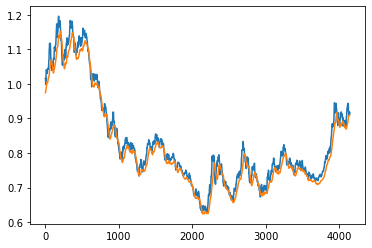

In [174]:
y_test = []
y_test_pr = []
for x,y in X:
    y_test += list(y)
    y_test_pr += list(model.predict(x).reshape(-1))
plt.plot(y_test)
plt.plot(y_test_pr)